# Сборный проект №2

## Постановка задачи

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.
Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки.
Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.
   
## Технологический процесс

Когда добытая руда проходит первичную обработку, получается дроблёная смесь. Её отправляют на флотацию (обогащение) и двухэтапную очистку.

1. Флотация
Во флотационную установку подаётся смесь золотосодержащей руды. После обогащения получается черновой концентрат и «отвальные хвосты», то есть остатки продукта с низкой концентрацией ценных металлов.
На стабильность этого процесса влияет непостоянное и неоптимальное физико-химическое состояние флотационной пульпы (смеси твёрдых частиц и жидкости).
2. Очистка
Черновой концентрат проходит две очистки. На выходе получается финальный концентрат и новые отвальные хвосты.

## Описание данных

* Технологический процесс

|признак|описание|
|---|---|
|Rougher feed|исходное сырье|
|Rougher additions (или reagent additions)|флотационные реагенты: Xanthate, Sulphate, Depressant|
|Xanthate|ксантогенат (промотер, или активатор флотации)|
|Sulphate|сульфат (на данном производстве сульфид натрия)|
|Depressant|депрессант (силикат натрия)|
|Rougher process (англ. «грубый процесс»)|флотация|
|Rougher tails|отвальные хвосты|
|Float banks|флотационная установка|
|Cleaner process|очистка|
|Rougher Au|черновой концентрат золота|
|Final Au|финальный концентрат золота|

* Параметры этапов

|признак|описание|
|---|---|
|air amount|объём воздуха|
|fluid levels|уровень жидкости|
|feed size|размер гранул сырья|
|feed rate|скорость подачи|

## Наименование признаков

[этап].[тип_параметра].[название_параметра]

## Метрика качества
sMAPE

## целевой признак - эффективность обогащения(recovery)

* C — доля золота в концентрате после флотации/очистки;
* F — доля золота в сырье/концентрате до флотации/очистки;
* T — доля золота в отвальных хвостах после флотации/очистки.

## Recovery = C*(F-T) / F(C-T)

## Содержание:

1. Подготовка данных

    1.1 импорт библиотек    
    1.2 загрузка данных    
    1.3 производственный процесс    
    1.4 ставим в трейне признаки, присутствующие в тесте, выделим признаки, отсутствующие в тесте    
    1.5 сортируем признаки в порядке выполнения производственного процесса    
    1.6 отделяем данные о черновом и финальном концентратах    
    1.7 проверка того, что эффективность обогащения рассчитана правильно    
    1.8 анализ признаков, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?
    
2. Проанализируйте данные

    2.1 изменение концентрации металлов (Au, Ag, Pb) на различных этапах очистки
    2.2 сравнение распределения размеров гранул сырья на обучающей и тестовой выборках. 
    
3. Моделирование

    3.1 функция для вычисления итоговой sMAPE    
    3.2 обучение разных моделей и оценение их качества
    
    
## Выводы:

* присутствуют поторяющиеся строки (удалим)
* доли nan в трейне и тесте распределены по-разному(в тесте не превышают 0.06, в трейне - 0.11
* в общем случае nan не больше ~.03
* отсутствующие признаки - характеристики, вычисляемые после производственного процесса
* похоже, названия целевых переменных поменяли местами(эффективность финального концентрата должна быть выше эффективности исходного)
* присутствуют нулевые значения (ими, скорее всего, были заполнены пропуски)
* присутствуют характеристики, которые измеряются после технологического процесса, поэтому они отсутствуют в тесте
* элементы: ag, pb, au, sol
* оставим индексы с ненулевым и не nan таргетом
* на этапе очистки доли концентратов au, pb, sol выше долей хвостов (более чистая смесь?)
* по-разному меняются и другие характеристики
* пропущенные значения выбрасывать не будем 
распределения всех признаков в тесте и трейне разные, средние одинаковые (кроме rougher.state.floatbank10_c_air - удалим его)
* некоторые признаки сильно коррелируют

* rougher

|model|mean_cv|selected_mean_cv|selected_tuned_mean_cv|
|---|---|---|---|
|knn|0.05699422802640525|0.057002354820046966|0.05183314030498091|
|rf|0.061685970929276704|0.06133283616656747|0.05984908420063571|
|lgb|0.06426503666545977|0.06427432693402922|0.06427432693402922|
|dt|0.08442023177247264|0.08241751761381276|0.07488083851825938|
|lr|0.08166464578609513|0.0815814493978417|nan|

* cleaner

|model|mean_cv|selected_mean_cv|selected_tuned_mean_cv|
|---|---|---|---|
|knn|0.026036926803692195|0.026005871675204746|0.025940401654386214|
|rf|0.02894559464732761|0.02892127029336186|0.02892127029336186|
|lgb|0.03429881236117789|0.03430279815616245|0.03430279815616245|
|dt|0.03693996050387871|0.0360232113210459|0.0360232113210459|
|lr|0.04902270002712837|0.04901779349679982|nan|

* финальная метрика  0.06201079755301554

## Вывод: 
* обработка включает в себя 2 этапа
* для каждого этапа требовалось предсказать эффективность месторождения
* финальная эффективность считалась как взвешенная сумма (.25 * концетрат + .75 * финальный концентрат)
* были использованы моедли: линейная регрессия, решающее дерево, случайный лес, бустинг, ближайшие соседи
* лучше всего показали себя ближайшие соседи
* это связано с особенностями данных: предсказывать эффектитвность точки логично по эффективностям похожих на эту точку месторождений

## 1. Подготовьте данные

### 1.1 импорт библиотек

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split,cross_validate, TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from tqdm import tqdm_notebook
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack, csc_matrix
from sklearn.model_selection import GridSearchCV, ParameterGrid
import time
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import category_encoders as ce
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.base import BaseEstimator

SEED = 13
ALPHA = .05

### 1.2 загрузка данных


In [2]:
df_train = pd.read_csv('datasets/gold_recovery_train.csv.', parse_dates =True, index_col = 0).sort_index()
df_test = pd.read_csv('datasets/gold_recovery_test.csv.', parse_dates =True, index_col = 0).sort_index()
df_full = pd.read_csv('datasets/gold_recovery_full.csv.', parse_dates =True, index_col = 0).sort_index()

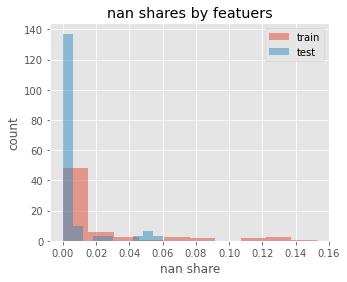

In [3]:
plt.figure(figsize = (5, 4))
df_train.isna().mean().hist(density=1, alpha = .5)
df_test.isna().mean().hist(density=1, alpha = .5)
plt.title('nan shares by featuers')
plt.xlabel('nan share')
plt.ylabel('count')
plt.legend(['train', 'test'])
plt.show()

In [4]:
print('доля дубликатов строк в трейне = {:.5f}'.format(df_train.duplicated().mean()))
print('доля дубликатов строк в тесте = {:.5f}'.format(df_test.duplicated().mean()))

доля дубликатов строк в трейне = 0.00095
доля дубликатов строк в тесте = 0.00102


In [5]:
df_test = df_test[~df_test.duplicated()]

#### Выводы: 
* удалим повторяющиеся строки
* доли nan в трейне и тесте распределены по-разному(в тесте не превышают 0.06, в трейне - 0.11
* в общем случае nan не больше ~.03

### 1.3 производственный процесс


In [6]:
print('\t\t\t\tСмесь золотоносной руды')
print('\t\t\t\t\t\t|')
print('\t\t\t\t\t\t|')
print('\t\t\t\t\t\tV')
print('\t\t\t\t\t   Флотация')
print('\t\t\t\t\t\t|')
print('\t\t\t\t\t\t|')
print('\t\t\t\t\t\tV')
print('\t\t\tчерновой концентрат\t   отвальные хвосты')
print('\t\t\t\t\t\t|')
print('\t\t\t\t\t\t|')
print('\t\t\t\t\t\tV')
print('\t\t\tпервый этап очистки')
print('\t\t\t\t\t\t|')
print('\t\t\t\t\t\t|')
print('\t\t\t\t\t\tV')
print('\t\t\tвторой этап очистки')
print('\t\t\t\t\t\t|')
print('\t\t\t\t\t\t|')
print('\t\t\t\t\t\tV')
print('\t\t\tфинальный концентрат\t+  отвальные хвосты')

				Смесь золотоносной руды
						|
						|
						V
					   Флотация
						|
						|
						V
			черновой концентрат	   отвальные хвосты
						|
						|
						V
			первый этап очистки
						|
						|
						V
			второй этап очистки
						|
						|
						V
			финальный концентрат	+  отвальные хвосты


Нужно спрогнозировать сразу две величины:
* эффективность обогащения чернового концентрата rougher.output.recovery;
* эффективность обогащения финального концентрата final.output.recovery.

Наименование признаков должно быть такое:
[этап].[тип_параметра].[название_параметра]

In [7]:
df_train_in_te = df_train[df_test.columns]
df_train_not_in_te = df_train.drop(df_test.columns, 1)

### 1.4 ставим в трейне признаки, присутствующие в тесте, выделим признаки, отсутствующие в тесте(сортируем признаки в порядке выполнения производственного процесса)


In [8]:
def _order_columns(df):
    '''
    сортирует колонки в порядке выполнения производственного процесса
    '''
    
    # словари с порядком выполнения этапов
    steps_order_d = {'rougher':1,'primary_cleaner':2, 'secondary_cleaner' :3, 'final': 4}
    types_d={'input':1, 'output':2,'state':3,'calculation':4}
    
    # сортируем колонки в порядке выполнения этапов производства
    report_tr = pd.DataFrame([col.split('.') for col in df.columns],\
                              columns = ['этап', 'тип_параметра', 'название_параметра'])    
    report_tr_c = report_tr.copy()   

    report_tr_c['этап'] = report_tr['этап'].map(steps_order_d)
    report_tr_c['тип_параметра'] = report_tr['тип_параметра'].map(types_d)

    columns_ordered = report_tr.loc[report_tr_c.sort_values('этап').index]\
                               .apply(lambda x:'.'.join(x), axis = 1).values
    
    return df.loc[:, columns_ordered]
    
    

In [9]:
df_train = _order_columns(df_train)
df_test = _order_columns(df_test)

In [10]:
print('число признаков в трейне = {}'.format(df_train_in_te.shape[1]))
print('число признаков в тесте = {}'.format(df_test.shape[1]))


число признаков в трейне = 52
число признаков в тесте = 52


#### Вывод: отсутствующие признаки - характеристики, вычисляемые после производственного процесса

### 1.4 отделяем данные о черновом и финальном концентратах
* таргет(y)
* признаки(X)



In [11]:
features = df_test.columns.values
targets = ['rougher.output.recovery', 'final.output.recovery']

features_train = df_train[features]
target_train = df_train[targets]
features_test = df_test[features]
target_test = df_full[targets].loc[df_test.index]

rougher_mask = features_train.columns.str.contains('rougher')
X_rougher_tr = features_train.loc[:, rougher_mask]
X_cleaner_tr = features_train.loc[:, ~rougher_mask]
y_rougher_tr = target_train['rougher.output.recovery']
y_cleaner_tr = target_train['final.output.recovery']

X_rougher_te = features_test.loc[:, rougher_mask]
X_cleaner_te = features_test.loc[:, ~rougher_mask]
y_rougher_te = target_test['rougher.output.recovery']
y_cleaner_te = target_test['final.output.recovery']

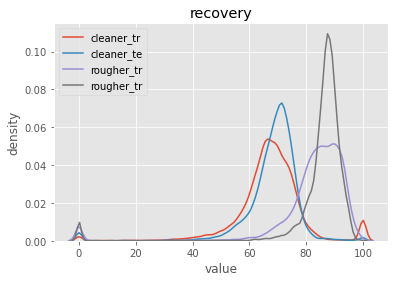

In [12]:
plt.title('recovery')
sns.kdeplot(y_cleaner_tr, label = 'cleaner_tr')
sns.kdeplot(y_cleaner_te, label = 'cleaner_te')
sns.kdeplot(y_rougher_tr, label = 'rougher_tr')
sns.kdeplot(y_rougher_te, label = 'rougher_tr')
plt.xlabel('value')
plt.ylabel('density')
plt.show()

In [13]:
print('rougher top5 mean corr with target rougher = {}'\
      .format(X_rougher_tr.corrwith(y_rougher_tr).abs().sort_values(ascending = False).head(5).mean()))

print('rougher top5 mean corr with target cleaner = {}'\
      .format(X_rougher_tr.corrwith(y_cleaner_tr).abs().sort_values(ascending = False).head(5).mean()))

rougher top5 mean corr with target rougher = 0.21708311070538114
rougher top5 mean corr with target cleaner = 0.2771010391105754


In [14]:
y_cleaner_tr = target_train['rougher.output.recovery']
y_rougher_tr = target_train['final.output.recovery']
y_cleaner_te = target_test['rougher.output.recovery']
y_rougher_te = target_test['final.output.recovery']

y_cleaner_tr = y_cleaner_tr.replace({0:np.nan}).dropna()
y_rougher_tr = y_rougher_tr.replace({0:np.nan}).dropna()
y_rougher_te = y_rougher_te.replace({0:np.nan}).dropna()
y_cleaner_te = y_cleaner_te.replace({0:np.nan}).dropna()

idx_use_tr = np.intersect1d(y_cleaner_tr.index, y_rougher_tr.index)
idx_use_te = np.intersect1d(y_cleaner_te.index, y_rougher_te.index)

y_cleaner_tr = y_cleaner_tr.loc[idx_use_tr].sort_index()
y_rougher_tr = y_rougher_tr.loc[idx_use_tr].sort_index()

y_cleaner_te = y_cleaner_te.loc[idx_use_te].sort_index()
y_rougher_te = y_rougher_te.loc[idx_use_te].sort_index()

X_rougher_tr = X_rougher_tr.loc[y_rougher_tr.index]
X_cleaner_tr = X_cleaner_tr.loc[y_cleaner_tr.index]

X_rougher_te = X_rougher_te.loc[y_rougher_te.index]
X_cleaner_te = X_cleaner_te.loc[y_cleaner_te.index]

#### Вывод:
* похоже, названия целевых переменных поменяли местами(эффективность финального концентрата должна быть выше эффективности исходного)
* присутствуют нулевые значения (ими, скорее всего, были заполнены пропуски)

### 1.4. Проверьте, что эффективность обогащения рассчитана правильно. Вычислите её на обучающей выборке для признака rougher.output.recovery. Найдите MAE между вашими расчётами и значением признака. Опишите выводы.




In [15]:
def _get_recovery(C, F, T):
    '''
    Выполняет: расчет эффективности обогащения 
    Параметры:
        1) C — доля золота в концентрате после флотации/очистки;
        2) F — доля золота в сырье/концентрате до флотации/очистки;
        3) T — доля золота в отвальных хвостах после флотации/очистки.
    Результат:
        эффективность обогащения 
    '''
    num = C*(F-T)
    den = F*(C-T)
    recovery = num/den * 100    
    return recovery

In [16]:
# параметры для расчета эффективности
f = df_train['rougher.input.feed_au']
c = df_train['rougher.output.concentrate_au']
t = df_train['rougher.output.tail_au']
# расчет эффективности по формуле
recovery_calculated = _get_recovery(c, f, t)
# без np.nan
recovery_calculated_notna = recovery_calculated.dropna()
# данная эффективность 
recovery_train = df_train['rougher.output.recovery']

print('рассчитанные и данные значения совпадают с точностью 1e-5 в {:.0%} случаев'\
      .format(np.isclose(recovery_train.loc[recovery_calculated_notna.index],\
                         recovery_calculated_notna, rtol=1e-05).mean()))
print('MAE между расчетами и исходными данными равен = {}'\
      .format((recovery_train.loc[recovery_calculated_notna.index] - recovery_calculated_notna).abs().mean()))

рассчитанные и данные значения совпадают с точностью 1e-5 в 98% случаев
MAE между расчетами и исходными данными равен = 9.444891926100695e-15


#### Вывод: эффективность обогащения рассчитана правильно(MAE между расчетами и данными -->0)

### 1.5. Проанализируйте признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?



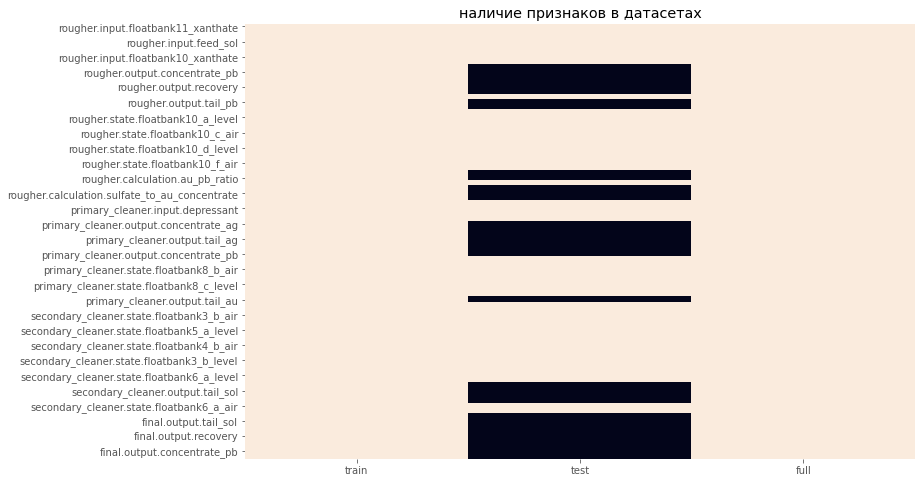

In [17]:
feature_report_df = pd.DataFrame()
for feat in df_train.columns:
    feature_report_df.loc[feat, 'train'] = 1
for feat in df_test.columns:
    feature_report_df.loc[feat, 'test'] = 1
for feat in df_full.columns:
    feature_report_df.loc[feat, 'full'] = 1
feature_report_df.fillna(0, inplace = True)    
feature_report_df = feature_report_df.astype(int)

plt.figure(figsize = (12, 8))
sns.heatmap(feature_report_df, cbar = False)
plt.title('наличие признаков в датасетах')
plt.show()

#### Вывод: 
* данные характеристики измеряются после технологического процесса, поэтому они отсутствуют в тесте
* элементы: ag, pb, au, sol
* оставим индексы с ненулевым и не nan таргетом

# 2. Проанализируйте данные

## 2.1. Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишите выводы.

In [18]:
df_tr_not_in_te = df_train.drop(df_test.columns, 1)
df_tr_not_in_te = df_tr_not_in_te.loc[:, ~df_tr_not_in_te.columns.str.contains('recovery')]
df_rougher = df_tr_not_in_te.loc[:, df_tr_not_in_te.columns.str.contains('rougher')]
df_cleaner = df_tr_not_in_te.loc[:, df_tr_not_in_te.columns.str.contains('cleaner')]
df_final = df_tr_not_in_te.drop(df_rougher.columns.tolist()+df_cleaner.columns.tolist(), 1)

* rougher

In [19]:
pd.concat([pd.Series(df_rougher.columns).to_frame('rougher_steps'),\
           pd.Series(df_cleaner.columns).to_frame('cleaner_steps'),\
           pd.Series(df_final.columns).to_frame('final_steps')], 1)\
 .astype(str).applymap(lambda x: '-->'.join(x.split('.')))

,rougher_steps,cleaner_steps,final_steps
0,rougher-->output-->concentrate_ag,primary_cleaner-->output-->concentrate_ag,final-->output-->tail_au
1,rougher-->output-->concentrate_pb,primary_cleaner-->output-->concentrate_sol,final-->output-->tail_sol
2,rougher-->output-->concentrate_sol,primary_cleaner-->output-->concentrate_au,final-->output-->tail_pb
3,rougher-->output-->concentrate_au,primary_cleaner-->output-->tail_ag,final-->output-->tail_ag
4,rougher-->output-->tail_ag,primary_cleaner-->output-->tail_pb,final-->output-->concentrate_au
5,rougher-->output-->tail_pb,primary_cleaner-->output-->tail_sol,final-->output-->concentrate_sol
6,rougher-->output-->tail_au,primary_cleaner-->output-->concentrate_pb,final-->output-->concentrate_pb
7,rougher-->output-->tail_sol,primary_cleaner-->output-->tail_au,final-->output-->concentrate_ag
8,rougher-->calculation-->au_pb_ratio,secondary_cleaner-->output-->tail_au,nan
9,rougher-->calculation-->floatbank10_sulfate_to...,secondary_cleaner-->output-->tail_sol,nan


In [20]:
con_out_mask= df_rougher.columns.str.contains('concentrate|output')

_df_other = df_rougher.loc[:,~con_out_mask]
_df_con_out = df_rougher.loc[:,con_out_mask]

In [21]:
cols_to_drop = ['rougher.calculation.floatbank10_sulfate_to_au_feed',
                'rougher.calculation.floatbank11_sulfate_to_au_feed',
                'rougher.calculation.au_pb_ratio','rougher.calculation.sulfate_to_au_concentrate']
_df_other = df_rougher[cols_to_drop]
_df_con_out = df_rougher.drop(cols_to_drop, 1)

In [22]:
def _mask_outliers(x1, iqr3):    
    q25, q75 = x1.quantile([.25, .75])
    iqr = q75-q25
    if not iqr3:
        return (x1>q25-1.5*iqr)&(x1<q75+1.5*iqr)
    else:
        return (x1>q25-3*iqr)&(x1<q75+3*iqr)

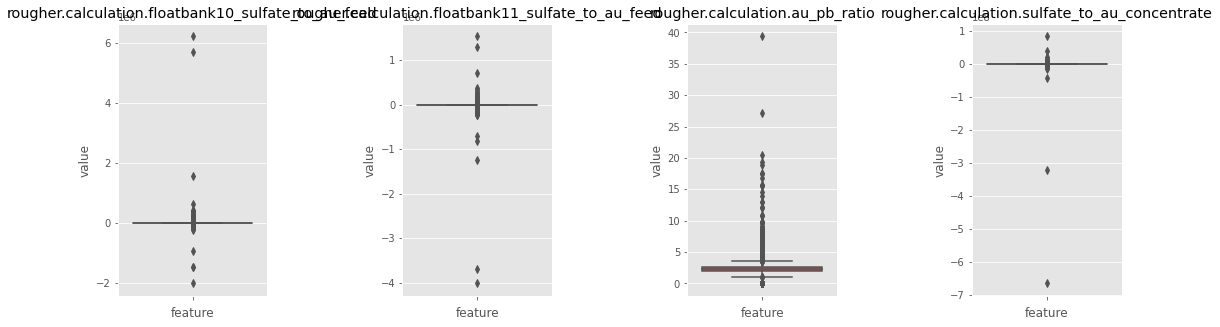

In [23]:
plt.figure(figsize = (18, 5))
for i, col in enumerate(_df_other.columns):    
    plt.subplot(1, 4, i+1)
    sns.boxplot(data = _df_other, y = col)
    plt.title(col)
    plt.ylabel('value')
    plt.xlabel('feature')
plt.subplots_adjust(wspace = .9)

In [24]:
mask_df = _df_other.apply(lambda x: _mask_outliers(x, iqr3=True))

In [25]:
for k, v in mask_df.mean().items():
    print('доля аномалий в {} равна {:.2f}'.format(k, 1-v))

доля аномалий в rougher.calculation.floatbank10_sulfate_to_au_feed равна 0.04
доля аномалий в rougher.calculation.floatbank11_sulfate_to_au_feed равна 0.03
доля аномалий в rougher.calculation.au_pb_ratio равна 0.09
доля аномалий в rougher.calculation.sulfate_to_au_concentrate равна 0.10


#### Вывод: аномалии могут свидетельствовать об особенностях производства, а не об ошибках в данных

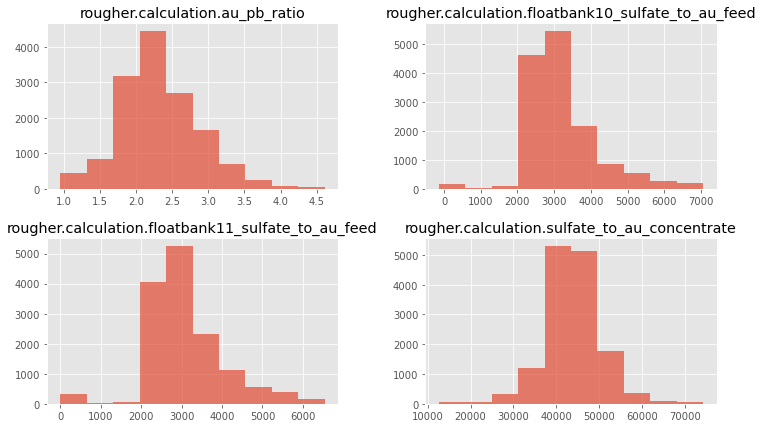

In [26]:
_df_other[mask_df.all(1)].replace({0:np.nan}).dropna().hist(figsize = (12, 7), alpha =.7)
plt.show()

#### Вывод: присутствуют тяжелые хвосты

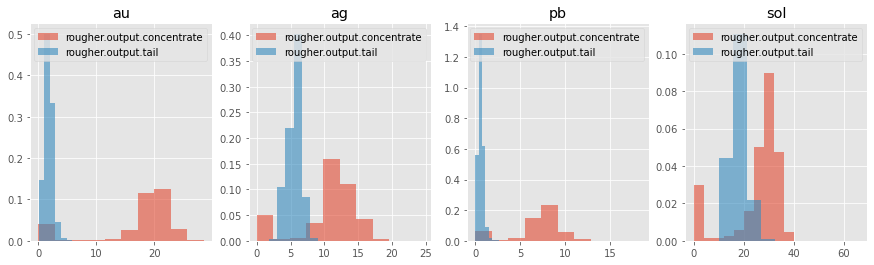

In [27]:
for i, feat in enumerate(('au', 'ag', 'pb', 'sol')):
    subdf = _df_con_out.loc[:, _df_con_out.columns.str.contains(feat)]
    ax = plt.subplot(1, 4, i+1)
    for col in subdf.columns:
        _df_con_out[col].hist(figsize = (15, 4), density=1, alpha = .6, ax = ax)
    plt.title(feat)
    plt.legend([c[:-len(feat)-1] for c in subdf.columns])

* cleaner

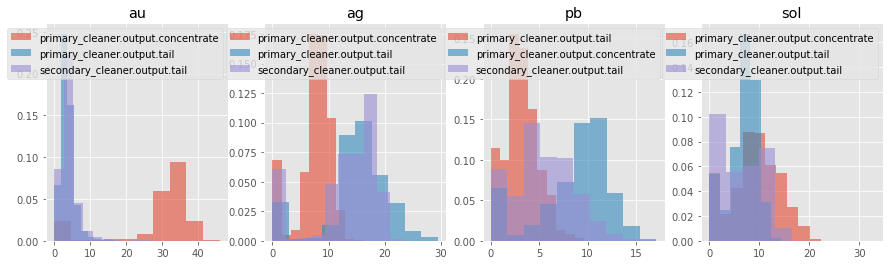

In [28]:
for i, feat in enumerate(('au', 'ag', 'pb', 'sol')):
    subdf = df_cleaner.loc[:, df_cleaner.columns.str.contains(feat)]
    ax = plt.subplot(1, 4, i+1)
    for col in subdf.columns:
        subdf[col].hist(figsize = (15, 4), density=1, alpha = .6, ax = ax)
    plt.title(feat)
    plt.legend([c[:-len(feat)-1] for c in subdf.columns])

#### Выводы:

* на этапе очистки доли концентратов au, pb, sol выше долей хвостов (более чистая смесь?)
* по-разному меняются и другие характеристики

* final

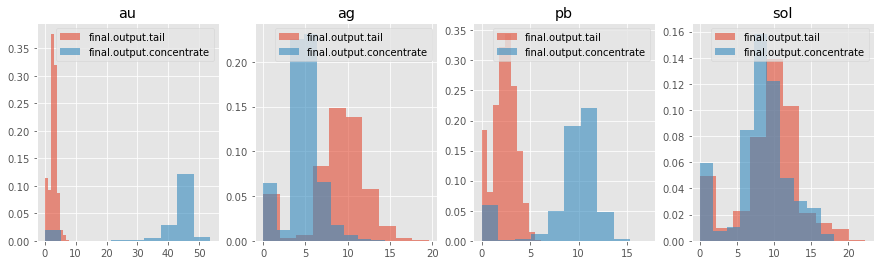

In [29]:
for i, feat in enumerate(('au', 'ag', 'pb', 'sol')):
    subdf = df_final.loc[:, df_final.columns.str.contains(feat)]
    ax = plt.subplot(1, 4, i+1)
    for col in subdf.columns:
        subdf[col].hist(figsize = (15, 4), density=1, alpha = .6, ax = ax)
    plt.title(feat)
    plt.legend([c[:-len(feat)-1] for c in subdf.columns])



#### Вывод: в итоге, металлы выдают на выходе разные пропрции концетрата и хвостов

## 2.2. Сравните распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.



In [30]:
def _check_dists_means(_x1,_x2,ALPHA):
    
    if not isinstance(_x1, pd.Series):
        _x1 = pd.Series(_x1)
    if not isinstance(_x2, pd.Series):
        _x2 = pd.Series(_x2)
        
    test_results = []    
    if (stats.normaltest(_x1.dropna())[1]<ALPHA) | (stats.normaltest(_x2.dropna())[1]<ALPHA):
        means_results = []
        _x1notna = _x1.dropna()
        _x2notna = _x2.dropna()
        for _ in range(100):
            np.random.seed(_)        
            x1_means = np.mean(np.random.choice(_x1notna, size = (1000, 100)), 1)
            x2_means = np.mean(np.random.choice(_x2notna, size = (1000, 100)), 1)
            if stats.ttest_ind(x1_means, x2_means, equal_var = True)[1] > ALPHA:
                means_results.append('средние разные')
            else:
                means_results.append('средние одинаковые')
        test_results.append(pd.Series(means_results).value_counts().idxmax())
    else:        
        if len(_x1)!=len(_x2):
            if stats.ttest_ind(_x1, _x2, equal_var = False)[1] > ALPHA:
                test_results.append('средние разные')
            else:
                test_results.append('средние одинаковые')

        else:
            if stats.ttest_ind(_x1, _x2, equal_var = True)[1] > ALPHA:
                test_results.append('средние разные')
            else:
                test_results.append('средние одинаковые')
    
    if stats.ks_2samp(_x1,_x2)[1] < ALPHA:
        test_results.append('распределения разные')
    else:
        test_results.append('распределения одинаковые')
    test_results.append('alpha = {:.0%}'.format(1-ALPHA))
    return test_results

In [31]:
size_tr = df_train.loc[:, df_train.columns.str.contains('size')]
size_te = df_test.loc[:, df_test.columns.str.contains('size')]

size_tr = size_tr[sorted(size_tr.columns)]
size_te = size_te[sorted(size_te.columns)]

	primary_cleaner.input.feed_size
['средние одинаковые', 'распределения разные', 'alpha = 95%']


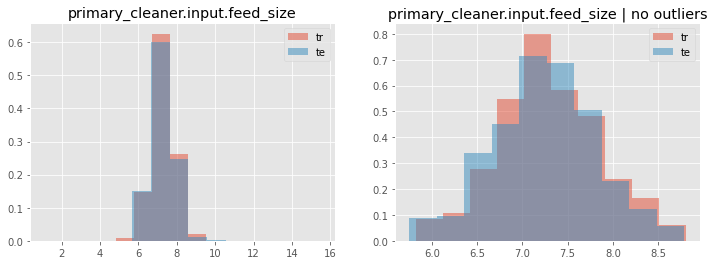

	rougher.input.feed_size
['средние одинаковые', 'распределения разные', 'alpha = 95%']


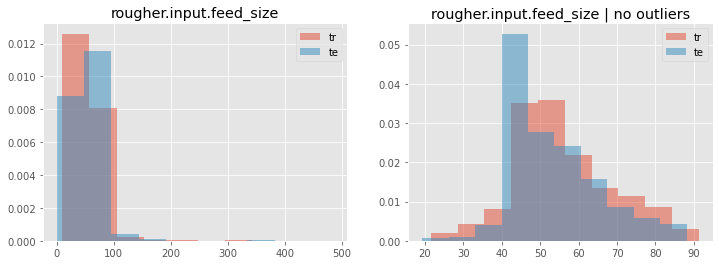

In [32]:
for col in size_tr.columns:
    _tr = size_tr[col]
    _te = size_te[col]
    print('\t'+col)
    print(_check_dists_means(_tr, _te, ALPHA))
    plt.figure(figsize = (12, 4))
    plt.subplot(1, 2, 1)
    _tr.hist(density = 1, alpha = .5)
    _te.hist(density = 1, alpha = .5)
    plt.title(col)
    plt.legend(['tr', 'te'])
    
    plt.subplot(1, 2, 2)
    _tr[_mask_outliers(_tr, iqr3=False)].hist(density = 1, alpha = .5)
    _te[_mask_outliers(_te, iqr3=False)].hist(density = 1, alpha = .5)
    plt.title(col+' | no outliers')
    plt.legend(['tr', 'te'])
    
    plt.show()

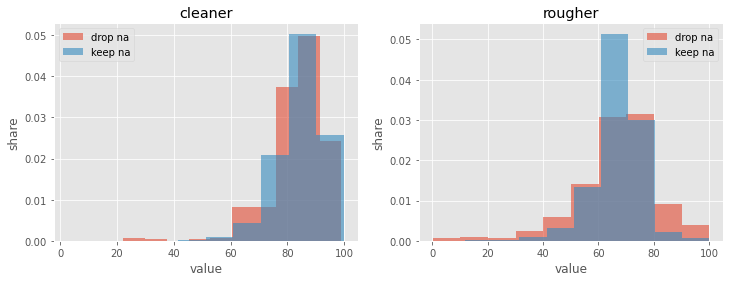

In [33]:
plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1)
y_cleaner_tr[X_cleaner_tr.isna().any(1)].hist(alpha = .6, density = 1)
y_cleaner_tr[~X_cleaner_tr.isna().any(1)].hist(alpha = .6, density = 1)
plt.title('cleaner')
plt.legend(['drop na', 'keep na'])
plt.xlabel('value')
plt.ylabel('share')

plt.subplot(1, 2, 2)
y_rougher_tr[X_rougher_tr.isna().any(1)].hist(alpha = .6, density = 1)
y_rougher_tr[~X_rougher_tr.isna().any(1)].hist(alpha = .6, density = 1)
plt.title('rougher')
plt.legend(['drop na', 'keep na'])
plt.xlabel('value')
plt.ylabel('share')

plt.show()

#### Вывод upd: пропущенные значения выбрасывать не будем 


In [34]:
for col in X_rougher_tr.columns:
    X_rougher_tr[col] = X_rougher_tr[col].fillna(X_rougher_tr[col].median())
    X_rougher_te[col] = X_rougher_te[col].fillna(X_rougher_te[col].median())
    
for col in X_cleaner_tr.columns:
    X_cleaner_tr[col] = X_cleaner_tr[col].fillna(X_cleaner_tr[col].median())
    X_cleaner_te[col] = X_cleaner_te[col].fillna(X_cleaner_te[col].median())
        

In [35]:
print('rougher размерности = ({}, {})'.format(X_rougher_tr.shape[1], X_rougher_te.shape[1]))
print('cleaner размерности  = ({}, {})'.format(X_cleaner_tr.shape[1], X_cleaner_te.shape[1]))
print('таргеты, минимум = {}, {}'.format(y_rougher_tr.min(), y_cleaner_tr.min()))
print('таргеты, nan = {}, {}'.format(y_rougher_tr.isna().any(), y_cleaner_tr.isna().any()))


rougher размерности = (22, 22)
cleaner размерности  = (30, 30)
таргеты, минимум = 0.1686109414550471, 2.5208538028907777
таргеты, nan = False, False


# 3. Постройте модель

## 3.1. Напишите функцию для вычисления итоговой sMAPE.

In [36]:
def sMAPE(target, predictions):    
    num = np.abs(target - predictions)
    den = (np.abs(target) + np.abs(predictions))/2
    return (num/den).mean()

def smape_blend(smape_rougher, smape_final):
    result = 0.25*smape_rougher + 0.75*smape_final
    return result
from sklearn.metrics import make_scorer
sMAPE_custom = make_scorer(sMAPE)

## 3.2. Обучите разные модели и оцените их качество кросс-валидацией. Выберите лучшую модель и проверьте её на тестовой выборке. Опишите выводы.

In [37]:
rougher_dummy = np.repeat(y_rougher_tr.mean(), len(y_rougher_tr))
cleaner_dummy = np.repeat(y_cleaner_tr.mean(), len(y_cleaner_tr))

baseline_rougher = sMAPE(y_rougher_tr, rougher_dummy)
baseline_cleaner = sMAPE(y_cleaner_tr, cleaner_dummy)

In [38]:
print('sMAPE baseline rougher = {}'.format(baseline_rougher))
print('sMAPE baseline cleaner = {}'.format(baseline_cleaner))
print('sMAPE baseline blend = {}'.format(smape_blend(baseline_rougher, baseline_cleaner)))

sMAPE baseline rougher = 0.10233630120235924
sMAPE baseline cleaner = 0.07347131979747629
sMAPE baseline blend = 0.08068756514869703


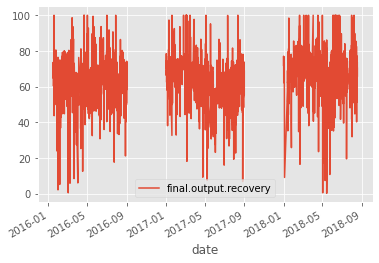

In [39]:
df_y_rougher_tr = pd.DataFrame(y_rougher_tr)

for idx in X_rougher_te.index:
    df_y_rougher_tr.loc[idx, 'final.output.recovery'] = np.nan
    
df_y_rougher_tr.sort_index().plot()    

In [40]:
from statsmodels.tsa.stattools import adfuller

if adfuller(y_rougher_tr)[1] < ALPHA:
    print('гипотеза о стационарности не отвергается')
else:
    print('гипотеза о стационарности отвергается')
    

гипотеза о стационарности не отвергается


#### Вывод: тренда не наблюдается, валидирваться можно без учета времени

#### Вывод: для теста были выбраны 2 отрезка, разделяющие трейн

### 3.2.1 анализ признаков (rougher)

In [41]:
pd.DataFrame.from_records({col:_check_dists_means(X_rougher_tr[col],\
                                                  X_rougher_te[col], ALPHA)\
                           for col in X_rougher_tr.columns}).T\
            .rename(columns = {0:'сравнение средних', 1:'сравнение распределений', 2:'уровень значимости'})
    
    

,сравнение средних,сравнение распределений,уровень значимости
rougher.input.feed_ag,средние одинаковые,распределения разные,alpha = 95%
rougher.input.feed_au,средние одинаковые,распределения разные,alpha = 95%
rougher.input.feed_pb,средние одинаковые,распределения разные,alpha = 95%
rougher.input.feed_rate,средние одинаковые,распределения разные,alpha = 95%
rougher.input.feed_size,средние одинаковые,распределения разные,alpha = 95%
rougher.input.feed_sol,средние одинаковые,распределения разные,alpha = 95%
rougher.input.floatbank10_sulfate,средние одинаковые,распределения разные,alpha = 95%
rougher.input.floatbank10_xanthate,средние одинаковые,распределения разные,alpha = 95%
rougher.input.floatbank11_sulfate,средние одинаковые,распределения разные,alpha = 95%
rougher.input.floatbank11_xanthate,средние одинаковые,распределения разные,alpha = 95%


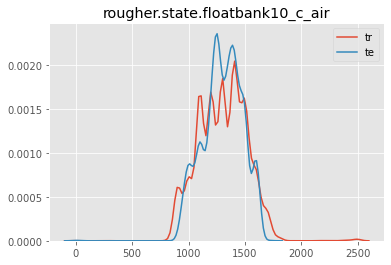

In [42]:
plt.title('rougher.state.floatbank10_c_air')
sns.kdeplot(X_rougher_tr['rougher.state.floatbank10_c_air'], label = 'tr')
sns.kdeplot(X_rougher_te['rougher.state.floatbank10_c_air'], label = 'te')
plt.show()

#### Вывод: распределения всех признаков в тесте и трейне разные, средние одинаковые (кроме rougher.state.floatbank10_c_air - удалим его)

In [43]:
X_rougher_tr = X_rougher_tr.drop('rougher.state.floatbank10_c_air', 1)
X_rougher_te = X_rougher_te.drop('rougher.state.floatbank10_c_air', 1)

In [44]:
to_bar = X_rougher_tr.corrwith(y_rougher_tr).sort_values()
to_color = to_bar.apply(lambda x: 'red' if x<0 else 'green')
corr_matrix = X_rougher_tr.corr()
corr_triu = corr_matrix.where(np.triu(np.ones_like(corr_matrix), k =1).astype(np.bool))

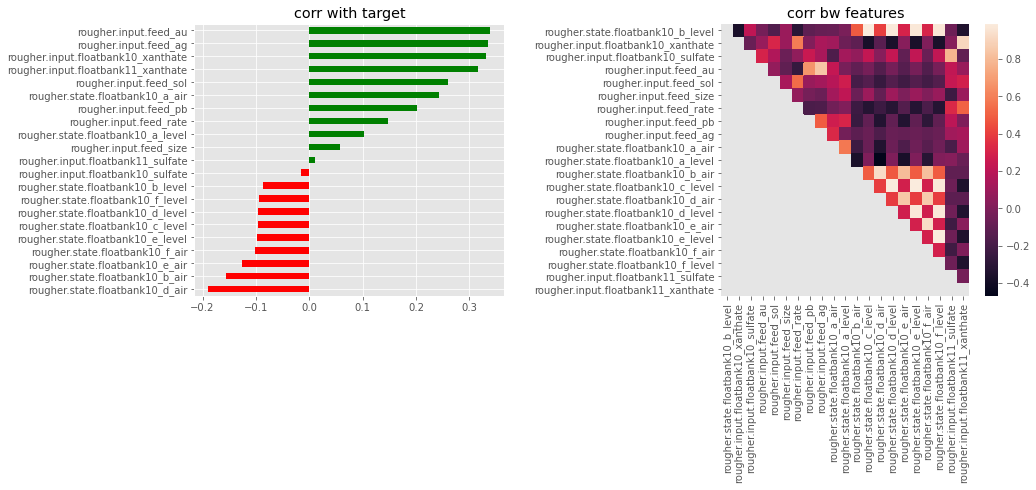

In [45]:
plt.figure(figsize = (15, 5))
ax1 = plt.subplot(1, 2, 1)
to_bar.plot(kind ='barh', color = to_color, ax = ax1)
plt.title('corr with target')

ax2 = plt.subplot(1, 2, 2)
sns.heatmap(corr_triu)
plt.title('corr bw features')
plt.subplots_adjust(wspace = .7)

In [46]:
corr_abs = corr_triu.stack().abs()
corr_abs[corr_abs>.9]

rougher.state.floatbank10_b_level   rougher.state.floatbank10_c_level     0.987757
                                    rougher.state.floatbank10_d_level     0.977691
                                    rougher.state.floatbank10_e_level     0.973262
                                    rougher.state.floatbank10_f_level     0.965981
rougher.input.floatbank10_xanthate  rougher.input.floatbank11_xanthate    0.905290
rougher.state.floatbank10_b_air     rougher.state.floatbank10_d_air       0.926472
rougher.state.floatbank10_c_level   rougher.state.floatbank10_d_level     0.987536
                                    rougher.state.floatbank10_e_level     0.984209
                                    rougher.state.floatbank10_f_level     0.976727
rougher.state.floatbank10_d_level   rougher.state.floatbank10_e_level     0.976675
                                    rougher.state.floatbank10_f_level     0.974439
rougher.state.floatbank10_e_air     rougher.state.floatbank10_f_air       0.930419
roug

#### Вывод: некоторые признаки сильно коррелируют

In [47]:
pd.DataFrame([c.split('.') for c in X_rougher_tr.columns]).sort_values(1)

,0,1,2
20,rougher,input,floatbank11_xanthate
1,rougher,input,floatbank10_xanthate
2,rougher,input,floatbank10_sulfate
3,rougher,input,feed_au
4,rougher,input,feed_sol
5,rougher,input,feed_size
6,rougher,input,feed_rate
7,rougher,input,feed_pb
8,rougher,input,feed_ag
19,rougher,input,floatbank11_sulfate


In [48]:
for X in (X_rougher_tr, X_rougher_te):
    
    X['f1'] = X.loc[:, X.columns.str.contains('input')&\
             X.columns.str.contains('au|ag|pb|sol')].sum(1)
    X['f2'] = X.loc[:, X.columns.str.contains('input')&\
             X.columns.str.contains('floatbank11|floatbank10')].sum(1)

    X['f3'] = X.loc[:, X.columns.str.contains('state')&\
             X.columns.str.contains('level')].sum(1)
    X['f4'] = X.loc[:, X.columns.str.contains('state')&\
            ~X.columns.str.contains('air')].sum(1)
dates_tr =X_rougher_tr.index.round('H')
dates_te =X_rougher_te.index.round('H')

for X, dates in zip((X_rougher_tr, X_rougher_te), (dates_tr, dates_te)):
    X['year'] = dates.year
    X['month'] =dates.month
    X['day'] =dates.day
    X['dow'] =dates.dayofweek
    X['hour'] =dates.hour   
    
scaler = MinMaxScaler()
scaler.fit(X_rougher_tr)
X_rougher_tr = pd.DataFrame(np.log1p(scaler.transform(X_rougher_tr)), index = X_rougher_tr.index)
X_rougher_te = pd.DataFrame(np.log1p(scaler.transform(X_rougher_te)), index = X_rougher_te.index)

In [49]:
for X in (X_cleaner_tr, X_cleaner_te):
    
    X['f1'] = X.loc[:, X.columns.str.contains('input')&\
                      ~X.columns.str.contains('feed')].sum(1)
    X['f2'] = X.loc[:, X.columns.str.contains('air')].sum(1)
    X['f3'] = X.loc[:, X.columns.str.contains('level')].sum(1)
    
dates_tr =X_cleaner_tr.index.round('H')
dates_te =X_cleaner_te.index.round('H')

for X, dates in zip((X_cleaner_tr, X_cleaner_te), (dates_tr, dates_te)):
    X['year'] = dates.year
    X['month'] =dates.month
    X['day'] =dates.day
    X['dow'] =dates.dayofweek
    X['hour'] =dates.hour   
    
scaler = MinMaxScaler()
scaler.fit(X_cleaner_tr)
X_cleaner_tr = pd.DataFrame(np.log1p(scaler.transform(X_cleaner_tr)), index = X_cleaner_tr.index)
X_cleaner_te = pd.DataFrame(np.log1p(scaler.transform(X_cleaner_te)), index = X_cleaner_te.index)

In [50]:
class FeatureSelector():
    def __init__(self, estimator, metric, cv, use_values, use_recursion, fill_na, show_progress, larger_is_better, early_stopping = None):
        self.estimator = estimator
        self.metric = metric
        self.cv = cv
        self.use_values = use_values        
        self.use_recursion = use_recursion
        self.show_progress = show_progress
        self.early_stopping = early_stopping
        self.fill_na = fill_na
        self.larger_is_better = larger_is_better
    def fit(self, X, Y):        
        flag = isinstance(X[:, 0], csc_matrix)
        # список с результатами валидации
        column_value_score = []
        # проходим по признакам
        for i in tqdm_notebook(range(X.shape[1])):
            # если формат матрицы признаков == csc_matrix
            if flag:
                # выбираем столбец, преобразуем
                ser = pd.DataFrame(X[:, i].todense())[0].values.flatten()
            # если формат != csc_matrix
            else:
                # выбираем столбец
                ser = X[:, i]        
            # если столбец в списке с проверкой значений 
            if self.use_values is not None:                
                if i in self.use_values:
                    # уникальные значения столбца
                    unique_values = np.unique(ser)  
                    # валидируем каждое значение
                    for val in unique_values:
                        _x = np.int32(ser==val).reshape(-1,1)
                        column_value_score.append((i, val,\
                                                   cross_val_score(self.estimator,\
                                                                   _x, Y,\
                                                                   scoring = self.metric,\
                                                                   cv = self.cv).mean()))
                else: 
                    # валидируем столбец
                    column_value_score.append((i, None,\
                                               cross_val_score(self.estimator,\
                                                               _x, Y,\
                                                               scoring = self.metric,\
                                                               cv = self.cv).mean()))
            else:
                # валидируем столбец
                    column_value_score.append((i, None,\
                                               cross_val_score(self.estimator,\
                                                               ser.reshape(-1,1), Y,\
                                                               scoring = self.metric,\
                                                               cv = self.cv).mean()))
                

        # признаки и значения признаков в порядке убывания валидации
        order = np.array(sorted(column_value_score, key = lambda x: x[-1], reverse = True))[:, :2]             
        # список лучших признаков
        best_features = []
        # словарь лучших значений признаков
        D_best_features = defaultdict(list)
        # список с признаками, не давшими прироста
        to_drop = []
        
        # лучшее значение метрики
        if self.larger_is_better:
            best_score = 0
        else:
            best_score = np.inf            
        counter = 0
        # проходим по признакам и значениям признаков в порядке убывания валидации
        for feature, feature_value in tqdm_notebook(order):   

            # добавляем текущие признаки/значения
            if feature_value is None:
                best_features.append(feature)               
            else:
                D_best_features[feature].append(feature_value)

            # обновляем матрицы
            L = []
            for k, v in D_best_features.items():
                if isinstance(X[:, k], csc_matrix):
                    L.append(pd.DataFrame(X[:, k].tocsc().todense())[0].apply(lambda x: x if x in v else self.fill_na))
                else:
                    L.append(pd.Series(X[:, k].flatten()).apply(lambda x: x if x in v else self.fill_na))

            if flag:
                if (len(best_features)>0) & (len(L)>0):
                    _X = csc_matrix(hstack([X[:, best_features], csc_matrix(np.column_stack(L)) ]))
                elif (len(best_features)==0) & (len(L)>0):
                    _X = csc_matrix(np.column_stack(L))
                elif (len(best_features)>0) & (len(L)==0):
                    _X = csc_matrix(X[:, best_features])                    
                        
            else:
                if (len(best_features)>0) & (len(L)>0):
                    _X = np.column_stack([X[:, best_features], np.column_stack(L)])
                elif (len(best_features)==0) & (len(L)>0):
                    _X = np.column_stack(L)
                elif (len(best_features)>0) & (len(L)==0):
                    _X = X[:, best_features] 
            # считаем валидацию    
            current_score = cross_val_score(self.estimator, _X, Y, scoring = self.metric, cv = self.cv).mean()
            # если метрика улучшилась
            if self.larger_is_better:
                if current_score>best_score:
                    # обновляем лучшую метрику
                    best_score = current_score
                    counter = 0
                    # печатаем 
                    if self.show_progress:
                        print('new best_score = {}'.format(best_score))
                # если метрика не улучшилась
                else: 
                    counter+=1
                    # удаляем признак/значение
                    if feature_value is None:
                        best_features = [val for val in best_features if val != feature]
                        to_drop.append((feature, None))
                    else:
                        D_best_features[feature] = [val for val in D_best_features[feature] if val != feature_value]    
                        to_drop.append((feature, feature_value))
                    if counter == self.early_stopping:
                        break
            else:
                if current_score<best_score:
                    # обновляем лучшую метрику
                    best_score = current_score
                    counter = 0
                    # печатаем 
                    if self.show_progress:
                        print('new best_score = {}'.format(best_score))
                    # если метрика не улучшилась
                else: 
                    counter+=1
                    # удаляем признак/значение
                    if feature_value is None:
                        best_features = [val for val in best_features if val != feature]
                        to_drop.append((feature, None))
                    else:
                        D_best_features[feature] = [val for val in D_best_features[feature] if val != feature_value]    
                        to_drop.append((feature, feature_value))
                    if counter == self.early_stopping:
                        break

        if self.use_recursion:
            # запускаем бесконечный цикл
            while True:
                # списки лучших признаков до и после
                to_drop_before = to_drop
                to_drop_after = []
                # проходим по признакам и значениям признаков в порядке убывания валидации
                for feature, feature_value in tqdm_notebook(to_drop_before):   
                    # добавляем текущие признаки/значения
                    if feature_value is None:
                        best_features.append(feature)               
                    else:
                        D_best_features[feature].append(feature_value)

                    # обновляем матрицы
                    L = []
                    for k, v in D_best_features.items():
                        if isinstance(X[:, k], csc_matrix):
                            L.append(pd.DataFrame(X[:, k].tocsc().todense())[0].apply(lambda x: x if x in v else self.fill_na))
                        else:
                            L.append(pd.Series(X[:, k].flatten()).apply(lambda x: x if x in v else self.fill_na))

                    if flag:
                        if (len(best_features)>0) & (len(L)>0):
                            _X = csc_matrix(hstack([X[:, best_features], csc_matrix(np.column_stack(L)) ]))
                        elif (len(best_features)==0) & (len(L)>0):
                            _X = csc_matrix(np.column_stack(L))
                        elif (len(best_features)>0) & (len(L)==0):
                            _X = csc_matrix(X[:, best_features])                    

                    else:
                        if (len(best_features)>0) & (len(L)>0):
                            _X = np.column_stack([X[:, best_features], np.column_stack(L)])
                        elif (len(best_features)==0) & (len(L)>0):
                            _X = np.column_stack(L)
                        elif (len(best_features)>0) & (len(L)==0):
                            _X = X[:, best_features] 

                    # считаем валидацию    
                    current_score = cross_val_score(self.estimator, _X, Y, scoring = self.metric, cv = self.cv).mean()
                    
                    
                    
                    
                    
                    
                    if self.larger_is_better:
                        if current_score>best_score:
                            # обновляем лучшую метрику
                            best_score = current_score
                            counter = 0
                            # печатаем 
                            if self.show_progress:
                                print('new best_score = {}'.format(best_score))
                            # если метрика не улучшилась
                        else: 
                            # удаляем признак/значение
                            if feature_value is None:
                                best_features = [val for val in best_features if val != feature]
                                to_drop_after.append((feature, None))
                            else:
                                D_best_features[feature] = [val for val in D_best_features[feature] if val != feature_value]    
                                to_drop_after.append((feature, feature_value))
                    else:
                        if current_score<best_score:
                            # обновляем лучшую метрику
                            best_score = current_score
                            counter = 0
                            # печатаем 
                            if self.show_progress:
                                print('new best_score = {}'.format(best_score))
                        else: 
                            # удаляем признак/значение
                            if feature_value is None:
                                best_features = [val for val in best_features if val != feature]
                                to_drop_after.append((feature, None))
                            else:
                                D_best_features[feature] = [val for val in D_best_features[feature] if val != feature_value]    
                                to_drop_after.append((feature, feature_value))
                    

                # если списки одинаковые, останавливаем отбор
                if len(to_drop_after) == len(to_drop_before):
                    break
                # если разные - обновляем списки до и после
                else:
                    to_drop_before = to_drop_after
                    to_drop_after = []
                    
        self.best_features = best_features
        self.D_best_features = D_best_features
        self.best_score =best_score
        self.flag = flag
    def transform(self, X):
              
        if len(self.best_features) !=0:
            x1 = X[:, self.best_features]
        else:
            x1 = None
        if len(list(self.D_best_features.keys())) !=0:
            L=[]
            for k, v in self.D_best_features.items():
                if self.flag:
                    L.append(pd.DataFrame(X[:, k].tocsc().todense())[0].apply(lambda x: x if x in v else self.fill_na))                    
                else:
                    L.append(pd.Series(X[:, k].flatten()).apply(lambda x: x if x in v else self.fill_na))
            x2 = np.column_stack(L)
        else:
            x2 = None
            
        if (x1 is not None) & (x2 is not None):
            if self.flag: 
                _X = csc_matrix(hstack([x1, x2]))
            else:
                _X = np.column_stack([x1, x2])
                
        if (x1 is not None) & (x2 is None):
            _X = x1
        if (x1 is None) & (x2 is not None):
            if self.flag:
                _X = csc_matrix(x2)
            else:
                _X = x2
        return _X     
        
    def return_self(self):
        return self
    
            
            
            

In [51]:

dt_params = {'min_samples_split': range(2, 16, 2), 
             'min_samples_leaf':range(1, 12, 2),
             'random_state':[SEED]}
rf_params = {'n_estimators':[100],
             'min_samples_leaf':[1,3],
             'min_samples_split':[2,4], 
             'random_state':[SEED],
             'n_jobs':[-1]}

knn_params = {'n_neighbors':[5,7,9],
              'leaf_size':[1,3,5],
              'weights':['uniform', 'distance'],              
              'n_jobs':[-1]}

lgb_params = {'n_estimators' :[100], 'max_depth' : [2, 4, 6, 8], 'num_leaves':[2**i for i in range(1, 5)],\
              'min_child_samples' :[20, 50],\
              'subsample':[.7, 1], 'colsample_bytree':[.5, 1],\
              'random_state':[SEED], 'learning_rate':[.02, .05, .1]} 

NFOLDS = 5
TEST_SIZE = .1



In [52]:
D_report = {}
for NAME, (XTR, XTE, YTR, YTE) in tqdm_notebook(zip(('rougher', 'cleaner'),\
                                                    ((X_rougher_tr, X_rougher_te, y_rougher_tr, y_rougher_te),\
                                                    (X_cleaner_tr, X_cleaner_te, y_cleaner_tr, y_cleaner_te))), total = 2):
    
    estimators_D = dict(zip(('lr', 'dt', 'rf', 'knn', 'lgb'),\
                        (LinearRegression(), DecisionTreeRegressor(random_state = SEED),\
                         RandomForestRegressor(n_estimators = 20, random_state = SEED),\
                         KNeighborsRegressor(), LGBMRegressor(random_state = SEED))))
    
    # масштабируем признаки
    scaler = MinMaxScaler()
    scaler.fit(XTR)
    XTR = pd.DataFrame(scaler.transform(XTR), columns = XTR.columns, index = XTR.index)
    XTE = pd.DataFrame(scaler.transform(XTE), columns = XTE.columns, index = XTE.index)
    
    # делим трейн датасет на трейн и отложенную части
    x_tr, x_hold, y_tr, y_hold = train_test_split(XTR,\
                                                  YTR,\
                                                  test_size = TEST_SIZE, \
                                                  shuffle = True,\
                                                  random_state = SEED)
    
    print('GETTING BASELINE SCORES ...')
    # получаем бейзлайн метрики
    cvs_L = []
    for name, est in tqdm_notebook(estimators_D.items()):    
        smape_cv = cross_validate(est, x_tr, y_tr, scoring = sMAPE_custom, cv = NFOLDS)['test_score'].mean()    
        cvs_L.append((name, smape_cv))
    cvAB = pd.DataFrame.from_records(cvs_L).set_index(0)
    cvAB = cvAB.rename(columns = {1:'mean_cv'})
    cvAB.index.name = 'model'
    
    print('SELECTING FEATURES ...')  
    # отбираем признаки
    selection_D = {}
    for name, est in tqdm_notebook(estimators_D.items()):   
        selector = FeatureSelector(estimator = est,\
                                   metric = sMAPE_custom,\
                                   larger_is_better = False,\
                                   cv = NFOLDS,\
                                   use_values = None,\
                                   use_recursion = True,\
                                   fill_na = None,\
                                   show_progress = True)
        
        print('\t\t{}'.format(str.upper(name)))
        selector.fit(x_tr.values, y_tr.values)
        cvAB.loc[name, 'selected_mean_cv'] = selector.return_self().best_score
        x_selected_tr = pd.DataFrame(selector.transform(x_tr.values), index = x_tr.index)
        x_selected_hold = pd.DataFrame(selector.transform(x_hold.values), index = x_hold.index)
        x1_selected_te = pd.DataFrame(selector.transform(XTE.values), index = XTE.index)
        selection_D[name] = (x_selected_tr, x_selected_hold, x1_selected_te)
        print('------------------------------------------------------\n')

    models_L = (estimators_D['dt'],estimators_D['rf'],  estimators_D['knn'], estimators_D['lgb'])
    dt_x_selected_tr, dt_x_selected_hold, dt_x1_selected_te = selection_D['dt']
    rf_x_selected_tr, rf_x_selected_hold, rf_x1_selected_te = selection_D['rf']
    knn_x_selected_tr, knn_x_selected_hold, knn_x1_selected_te = selection_D['knn']
    lgb_x_selected_tr, lgb_x_selected_hold, lgb_x1_selected_te = selection_D['lgb']    
    Xs_L = (dt_x_selected_tr, rf_x_selected_tr,  knn_x_selected_tr, lgb_x_selected_tr)

    D_xs = {}
    D_xs['dt'] = {'train' : dt_x_selected_tr, 'hold':dt_x_selected_hold, 'test': dt_x1_selected_te}
    D_xs['rf'] = {'train' : rf_x_selected_tr, 'hold' : rf_x_selected_hold, 'test':rf_x1_selected_te}
    D_xs['knn'] = {'train' : knn_x_selected_tr, 'hold':knn_x_selected_hold, 'test':knn_x1_selected_te}
    D_xs['lgb'] = {'train':lgb_x_selected_tr, 'hold':lgb_x_selected_hold, 'test':lgb_x1_selected_te}

    names_L = ('dt', 'rf', 'knn', 'lgb')
    params_L = (dt_params, rf_params, knn_params,lgb_params)
    Xs_L = (dt_x_selected_tr, rf_x_selected_tr,  knn_x_selected_tr, lgb_x_selected_tr)

    D_best_estimators = {}    
    print('TUNING HYPERPARAMETERS ...')
    # оптимизируем гиперпараметры
    for name, params, model, X in tqdm_notebook(zip(names_L,params_L, models_L, Xs_L), total = len(names_L)):
        print('\t\tmodel = {}'.format(str.upper(name)))
        best_score = cvAB.loc[name,'selected_mean_cv']
        for par in tqdm_notebook(ParameterGrid(params)):
            _reg = model.set_params(**par)
            smape_cv = cross_validate(_reg, X, y_tr, scoring = sMAPE_custom, cv = NFOLDS)['test_score'].mean()
            if smape_cv<best_score:
                best_score = smape_cv
                best_params = par
                print('best score = {:.5f}'.format(best_score))                     

        cvAB.loc[name,'selected_tuned_mean_cv'] = best_score
        
        D_best_estimators[name] = model.set_params(**best_params)
        print('-----------------------------------\n')
    
    
    # сохраняем
    # 1) бейзлайн метрику, метрику после подбора гиерпараметров
    # 2) датасеты
    # 3) гиперпараметры
    D_report[NAME] = (cvAB, D_xs, D_best_estimators)

GETTING BASELINE SCORES ...



SELECTING FEATURES ...


		LR


new best_score = 0.1024560329129854
new best_score = 0.10235866314161793
new best_score = 0.09797158837543832
new best_score = 0.09791745915930324
new best_score = 0.09683167298585879
new best_score = 0.09678736610401441
new best_score = 0.09635399569321815
new best_score = 0.09620958485559813
new best_score = 0.09615135343561389
new best_score = 0.09587302028912865
new best_score = 0.09585568420734887
new best_score = 0.0955184338839898
new best_score = 0.09519528962181072
new best_score = 0.0947671900633981
new best_score = 0.09395946754801084
new best_score = 0.09383577181189307
new best_score = 0.09129533444344229
new best_score = 0.09125045984467717
new best_score = 0.09039545674711487
new best_score = 0.09026645039198646
new best_score = 0.08950267616230886
new best_score = 0.08850829108277443
new best_score = 0.08840615369311078
new best_score = 0.08562881077847073
new best_score = 0.0816099515760638



new best_score = 0.0815814493978417




------------------------------------------------------

		DT


new best_score = 0.14947225478976964
new best_score = 0.14760428722753732
new best_score = 0.14097307019603234
new best_score = 0.13050015773591875
new best_score = 0.12074906049999798
new best_score = 0.11409321556186627
new best_score = 0.1046039054308199
new best_score = 0.1041818787136271
new best_score = 0.10229359970455291
new best_score = 0.10115906406145359
new best_score = 0.10047106290083337
new best_score = 0.09531229289675369
new best_score = 0.09459637469163369
new best_score = 0.09204177052840831
new best_score = 0.09113707864760637
new best_score = 0.08763625481405886
new best_score = 0.08697052964902394
new best_score = 0.08645163619655274
new best_score = 0.08570769805841116
new best_score = 0.08435174324104612



new best_score = 0.08414178219272805
new best_score = 0.08369695041184608
new best_score = 0.08319721326335679
new best_score = 0.08241751761381276




------------------------------------------------------

		RF


new best_score = 0.12796370954118177
new best_score = 0.11200496757286252
new best_score = 0.10830575044347283
new best_score = 0.10608932910529323
new best_score = 0.10247735921309498
new best_score = 0.10170434118310816
new best_score = 0.09782313146087776
new best_score = 0.09182390902116208
new best_score = 0.08543106888551126
new best_score = 0.0818707183051141
new best_score = 0.07814559822467185
new best_score = 0.07611414089387177
new best_score = 0.07594791391468833
new best_score = 0.07522612311695684
new best_score = 0.07434353735716186
new best_score = 0.07353576612563531
new best_score = 0.06925445212727085
new best_score = 0.06827904908075615
new best_score = 0.06548283636900784
new best_score = 0.06541014883913152
new best_score = 0.06467165523650284
new best_score = 0.06401923183402854
new best_score = 0.0627720998726129
new best_score = 0.062419993887094474
new best_score = 0.06190565571430564



new best_score = 0.061839117674995316
new best_score = 0.06164503777364433
new best_score = 0.061588484171067034
new best_score = 0.06142416567040391



new best_score = 0.061415439315233286
new best_score = 0.06133283616656747




------------------------------------------------------

		KNN


new best_score = 0.1148515981150064
new best_score = 0.11323882042454222
new best_score = 0.1126208915783751
new best_score = 0.10692004826470178
new best_score = 0.10586761707380181
new best_score = 0.1049493450357881
new best_score = 0.0903771434328881
new best_score = 0.07226024418804802
new best_score = 0.0721381494820605
new best_score = 0.07211202880894109
new best_score = 0.06874465368200465
new best_score = 0.06494070383712906
new best_score = 0.06292004514944158
new best_score = 0.061048995193949775
new best_score = 0.06057364108700791
new best_score = 0.0596960330777309
new best_score = 0.05968749052920665
new best_score = 0.0592797600813873
new best_score = 0.05915537491853201
new best_score = 0.05901850144882202
new best_score = 0.0586779136590048
new best_score = 0.05814770847634555
new best_score = 0.057522464971847556
new best_score = 0.057309911836824656
new best_score = 0.05718857246625727
new best_score = 0.057170406860134325
new best_score = 0.057145319385352354
new 


------------------------------------------------------

		LGB


new best_score = 0.10279309824484514
new best_score = 0.09964218210956503
new best_score = 0.0939342025456613
new best_score = 0.0936771735626155
new best_score = 0.0935640072158185
new best_score = 0.09316321955118342
new best_score = 0.09302410335706883
new best_score = 0.0855365581760067
new best_score = 0.08145360761683931
new best_score = 0.07731289088622444
new best_score = 0.0750868412813546
new best_score = 0.07334994013088059
new best_score = 0.07085536072522372
new best_score = 0.07076102951159187
new best_score = 0.06937402276739596
new best_score = 0.06904821218300373
new best_score = 0.06877792817627533
new best_score = 0.06822182905014111
new best_score = 0.06784816177617162
new best_score = 0.06707905002868275
new best_score = 0.06643549623822328
new best_score = 0.06535314352563282
new best_score = 0.06507687279559674
new best_score = 0.06493080917161223



new best_score = 0.06468672460121838
new best_score = 0.06450769501483038
new best_score = 0.06427432693402922




------------------------------------------------------


TUNING HYPERPARAMETERS ...


		model = DT


best score = 0.08088
best score = 0.08079
best score = 0.07978
best score = 0.07921
best score = 0.07853
best score = 0.07793
best score = 0.07747
best score = 0.07745
best score = 0.07687
best score = 0.07650
best score = 0.07588
best score = 0.07552
best score = 0.07488

-----------------------------------

		model = RF


best score = 0.05985

-----------------------------------

		model = KNN


best score = 0.05183

-----------------------------------

		model = LGB



-----------------------------------


GETTING BASELINE SCORES ...



SELECTING FEATURES ...


		LR


new best_score = 0.07354589849912374
new best_score = 0.07354347983667656
new best_score = 0.0735382666806323
new best_score = 0.07352706614073168
new best_score = 0.07346647713694762
new best_score = 0.0734536429281423
new best_score = 0.07331726303064469
new best_score = 0.07310285738915238
new best_score = 0.07248512169404567
new best_score = 0.07225524404671387
new best_score = 0.07059313402568197
new best_score = 0.07036729780726785
new best_score = 0.06948811319683326
new best_score = 0.06688916339264352
new best_score = 0.06681365824497938
new best_score = 0.06617814318272278
new best_score = 0.06476316918716343
new best_score = 0.06443328555275954
new best_score = 0.06316359457655649
new best_score = 0.0624691909145087
new best_score = 0.06234059657060477
new best_score = 0.06117412828157291
new best_score = 0.06115914166077978
new best_score = 0.060936530484732895
new best_score = 0.06002261816465835
new best_score = 0.05832441615130497
new best_score = 0.05751447104697431
new

new best_score = 0.050415192157309816
new best_score = 0.05040774173898057
new best_score = 0.04986292244631153
new best_score = 0.04950631102005163
new best_score = 0.04948454679751625
new best_score = 0.049153893929670824
new best_score = 0.04901779349679982




------------------------------------------------------

		DT


new best_score = 0.10171640075921547
new best_score = 0.10104119217805338
new best_score = 0.0921708611442922
new best_score = 0.09056947075343394
new best_score = 0.09031794090249709
new best_score = 0.08924585881825206
new best_score = 0.08720311312149055
new best_score = 0.08315139130199843
new best_score = 0.0702644145238173
new best_score = 0.06706053575283573
new best_score = 0.05649772481439661
new best_score = 0.05210548331238608
new best_score = 0.04898940721198109
new best_score = 0.046741884326205525
new best_score = 0.04551827592809754
new best_score = 0.04458784771128042
new best_score = 0.044166636834455104
new best_score = 0.044086016982414176
new best_score = 0.043928182776687676
new best_score = 0.043222040150465595
new best_score = 0.04198472725597803
new best_score = 0.04120468253676214
new best_score = 0.040523561887382216
new best_score = 0.040001609881488896
new best_score = 0.03954473327393783



new best_score = 0.039090504012254224




------------------------------------------------------

		RF


new best_score = 0.08906960532586175
new best_score = 0.0797688119958653
new best_score = 0.07524811315623008
new best_score = 0.0723070114634363
new best_score = 0.07166251852283387
new best_score = 0.07081615472871876
new best_score = 0.0680826257869069
new best_score = 0.06319511165645865
new best_score = 0.061097734924023
new best_score = 0.06034953105497
new best_score = 0.05906126329328683
new best_score = 0.05896948512166178
new best_score = 0.05685790612337952
new best_score = 0.05614198916694263
new best_score = 0.049855245108400434
new best_score = 0.04347765600722866
new best_score = 0.039861810709451204
new best_score = 0.03885480369386144
new best_score = 0.038541238876021656
new best_score = 0.03670794580382773
new best_score = 0.035294054044349266
new best_score = 0.03438904705884839
new best_score = 0.03406994564930874
new best_score = 0.033927940018868855
new best_score = 0.03335643419569234
new best_score = 0.0333201903164927
new best_score = 0.03316534146326493
new b

new best_score = 0.03007350183203126



new best_score = 0.03002552658557689
new best_score = 0.029963617190746233




------------------------------------------------------

		KNN


new best_score = 0.08042524048076873
new best_score = 0.07937090498133068
new best_score = 0.07808743415783775
new best_score = 0.07509787252784325
new best_score = 0.06812166774854962
new best_score = 0.06705370932540682
new best_score = 0.06531857900205576
new best_score = 0.06342956824957931
new best_score = 0.0621034091638681
new best_score = 0.04989657010551026
new best_score = 0.04835833400877735
new best_score = 0.04700280397170631
new best_score = 0.046710201936905664
new best_score = 0.03799134889461758
new best_score = 0.03711651356185501
new best_score = 0.03444933060272316
new best_score = 0.03405203309836426
new best_score = 0.031000266063278797
new best_score = 0.03011155610900503
new best_score = 0.029571738711351197
new best_score = 0.02933337642148297
new best_score = 0.02917364488577278
new best_score = 0.029081269169079597
new best_score = 0.029025036116634734
new best_score = 0.028971228513565966
new best_score = 0.027392111347753684
new best_score = 0.0273880490634

new best_score = 0.026830842274991884
new best_score = 0.026690654884108777




------------------------------------------------------

		LGB


new best_score = 0.07395053500752752
new best_score = 0.07321346698782132
new best_score = 0.07205290585591279
new best_score = 0.07095207814898297
new best_score = 0.07000308337596316
new best_score = 0.06477735060888826
new best_score = 0.06332092904453637
new best_score = 0.06270991190833113
new best_score = 0.06159038476902325
new best_score = 0.05988996865869743
new best_score = 0.059417417222026946
new best_score = 0.0584126546636373
new best_score = 0.05720543886597549
new best_score = 0.05268947385241558
new best_score = 0.052654672917322266
new best_score = 0.050705213777102374
new best_score = 0.0483177358498682
new best_score = 0.043063642845526384
new best_score = 0.04302857088848524
new best_score = 0.03765251495437315
new best_score = 0.03618971023191977
new best_score = 0.035740653811550345
new best_score = 0.03565277581359598
new best_score = 0.0345526728019105
new best_score = 0.03380848028396225
new best_score = 0.03361811841299818
new best_score = 0.03350661185875803

new best_score = 0.03225922268246933




------------------------------------------------------


TUNING HYPERPARAMETERS ...


		model = DT


best score = 0.03894
best score = 0.03845
best score = 0.03819
best score = 0.03766
best score = 0.03743
best score = 0.03731
best score = 0.03705
best score = 0.03701
best score = 0.03677
best score = 0.03658
best score = 0.03621
best score = 0.03587

-----------------------------------

		model = RF


best score = 0.02906
best score = 0.02897

-----------------------------------

		model = KNN


best score = 0.02584

-----------------------------------

		model = LGB



-----------------------------------





In [53]:
D_report['rougher'][0].sort_values('selected_tuned_mean_cv')

,mean_cv,selected_mean_cv,selected_tuned_mean_cv
model,,,
knn,0.056994,0.057002,0.051833
rf,0.061686,0.061333,0.059849
lgb,0.064265,0.064274,0.064274
dt,0.084420,0.082418,0.074881
lr,0.081665,0.081581,NaN


In [54]:
D_report['cleaner'][0].sort_values('selected_tuned_mean_cv')

,mean_cv,selected_mean_cv,selected_tuned_mean_cv
model,,,
knn,0.026779,0.026691,0.025840
rf,0.030095,0.029964,0.028974
lgb,0.032386,0.032259,0.032259
dt,0.041998,0.039091,0.035874
lr,0.049023,0.049018,NaN


In [65]:
L_rougher = []
for _d1, _d2 in zip(D_report['rougher'][1].items(), D_report['rougher'][2].items()):
    est = _d2[1]
    xtr = _d1[1]['train']
    xhold = _d1[1]['hold']
    xte = _d1[1]['test']
    L_rougher.append((xtr, xhold, xte, est))
rougher_best = L_rougher[np.argmin(D_report['rougher'][0]['selected_tuned_mean_cv'].dropna())]

L_cleaner = []
for _d1, _d2 in zip(D_report['cleaner'][1].items(), D_report['cleaner'][2].items()):
    est = _d2[1]
    xtr = _d1[1]['train']
    xhold = _d1[1]['hold']
    xte = _d1[1]['test']
    L_cleaner.append((xtr, xhold, xte, est))
cleaner_best = L_cleaner[np.argmin(D_report['cleaner'][0]['selected_tuned_mean_cv'].dropna())]

In [66]:
x1tr, x1hold, x1te, est1 = rougher_best
x2tr, x2hold, x2te, est2 = cleaner_best

est1.fit(x1tr, y_rougher_tr.loc[x1tr.index])
print('holdout smape1 = {}'.format(sMAPE(y_rougher_tr.loc[x1hold.index], est1.predict(x1hold))))

est2.fit(x2tr, y_cleaner_tr.loc[x2tr.index])
print('holdout smape1 = {}'.format(sMAPE(y_cleaner_tr.loc[x2hold.index], est2.predict(x2hold))))

holdout smape1 = 0.050028950847798466
holdout smape1 = 0.02591024449062411


In [67]:
X1_tr = pd.concat([x1tr, x1hold],0)
y1_tr = y_rougher_tr.loc[X1_tr.index]

X2_tr = pd.concat([x2tr, x2hold],0)
y2_tr = y_cleaner_tr.loc[X2_tr.index]

est1.fit(X1_tr, y1_tr)
est2.fit(X2_tr, y2_tr)

y_pred_blend = smape_blend(est1.predict(x1te), est2.predict(x2te))
y_blend = smape_blend(y_rougher_te.values, y_cleaner_te.values)

print('финальная sMAPE = {}'.format(sMAPE(y_blend, y_pred_blend)))

финальная sMAPE = 0.06308836022743648


##### стекинг

In [107]:
class StackingRegressor(BaseEstimator):
    
    def __init__(self, models, nfolds, seed):
        '''
        models - список с ансамблем моделей
        nfolds - число фолдов для ооф предсказаний
        seed - генератор случайных чисел
        '''        
        self.models = models
        self.nfolds = nfolds
        self.seed = seed
    def fit(self, X, y):
        '''
        1) обучаем модели на валидации
        2) сохраняем обученные модели
        '''        
        try:
            _X, _y = np.array(X), np.array(y)
        except:
            _X, _y = X, y        
        estimators = []
        for model in tqdm_notebook(self.models):            
            for tr_idx, val_idx in KFold(self.nfolds, random_state = self.seed).split(_X):
                model.fit(_X[tr_idx], _y[tr_idx])
                estimators.append(model)
        self.fitted_estimators = estimators
    def get_metafeatures(self, X):
        '''
        с помощью обученных моделей получаем метапризнаки
        '''
        try:
            _X = np.array(X)
        except:
            _X = X
        L = []    
        for estimator in self.fitted_estimators:
            L.append(estimator.predict(_X))
        return np.column_stack(L)

In [119]:
# число итераций стекинга
NSTACKS = 2
# число фолдов
NFOLDS = 5
# доля используемых признаков
FEAT_USE_SHARE = .85
# базовые модели
model_names = [el for el in D_report['rougher'][2].keys()]
print(model_names)
BASE_MODELS = [DecisionTreeRegressor(), RandomForestRegressor(),\
               KNeighborsRegressor(), LGBMRegressor(random_state = SEED)]

['dt', 'rf', 'knn', 'lgb']


In [1]:
D_metas = {}
# rougher, leaner датасеты
for key, L, y_tr, y_te in tqdm_notebook(zip(('rougher', 'cleaner'),\
                              (L_rougher, L_cleaner),\
                              (y_rougher_tr, y_cleaner_tr),\
                              (y_rougher_te, y_cleaner_te)), total = 2):


    # трейн, отложенная, тест
    Xs1_tr = []
    Xs1_hold = []
    Xs1_te =[]
    for _xtr, _xhold, _xte, _est in L:    
        Xs1_tr.append(_xtr)
        Xs1_hold.append(_xhold)
        Xs1_te.append(_xte)    
    y1_tr, y1_hold, y1_te = y_tr.loc[Xs1_tr[0].index], y_tr.loc[Xs1_tr[1].index], y_te
    
    # стекинг
    L_tr = []
    L_hold = []
    L_te = []
    for seed in tqdm_notebook(range(NSTACKS)):
        for XTR, XHOLD, XTE, in zip(Xs1_tr, Xs1_hold, Xs1_te):  
            _XTR, _XHOLD, _XTE = np.array(XTR), np.array(XHOLD), np.array(XTE)
            _YTR, _YHOLD, _YTE = np.array(y1_tr), np.array(y1_hold), np.array(y1_te)
            # всего признаков
            nfeatures = _XTR.shape[1]
            # признаков использовать
            features_to_use = np.int32(np.ceil(FEAT_USE_SHARE * nfeatures))
            use_idxs = np.random.choice(np.arange(nfeatures), features_to_use)
            stacking_reg = StackingRegressor(models = BASE_MODELS,
                                             nfolds = NFOLDS,
                                             seed = SEED)        
            stacking_reg.fit(_XTR[:, use_idxs], _YTR)
            L_tr.append(stacking_reg.get_metafeatures(_XTR[:, use_idxs]))
            L_hold.append(stacking_reg.get_metafeatures(_XHOLD[:, use_idxs]))
            L_te.append(stacking_reg.get_metafeatures(_XTE[:, use_idxs]))

    X_meta_tr = np.column_stack(L_tr)
    X_meta_hold = np.column_stack(L_hold)
    X_meta_te = np.column_stack(L_te)
    
    # отбор метапризнаков
    TR = []
    HOLD =[]
    TE = []

    for estimator in tqdm_notebook(BASE_MODELS):
        selector = FeatureSelector(estimator = estimator,\
                                   metric = sMAPE_custom,\
                                   larger_is_better = False,\
                                   cv = NFOLDS,\
                                   use_values = None,\
                                   use_recursion = True,\
                                   fill_na = None,\
                                   show_progress = True)
        selector.fit(X_meta_tr, y1_tr.values)
        TR.append(selector.transform(X_meta_tr))
        HOLD.append(selector.transform(X_meta_hold))
        TE.append(selector.transform(X_meta_te))

    X1_meta_tr = np.column_stack(TR)
    X1_meta_hold = np.column_stack(HOLD)
    X1_meta_te = np.column_stack(TE)    
    D_metas[key] = ((X1_meta_tr, X1_meta_hold, X1_meta_te), (y1_tr, y1_hold, y1_te))